# Principal Component Analysis
Dans le cadre de notre implémentation des `DecisionTree` ainsi que des `RandomForest`, nous avons été confronté à des jeux de données conséquents. Une `PCA` est donc nécessaire.

Nous détaillons l'implémentation de cette classe sur divers exemples.

[Retour au sommaire](../README.md#table-des-matières)

In [1]:
import os
import sys

import numpy as np
from matplotlib import pyplot as plt

if os.getcwd().endswith("docs"):
    sys.path.append(os.path.join(os.getcwd(), ".."))

from ias import PCA
from ias.Datasets import Emnist

## Verification de l'implémentation sur un exemple simple

La fonction `two_component_data` génère ici un jeu de donnée ayant deux composantes indépendantes. On crée alors un jeu de donnée de 50 elements séparables en 2 composantes.

In [2]:
def two_component_data(element_number):
    elm_range = np.arange(element_number)
    return np.array(
        (elm_range ** 2, elm_range + 1, elm_range + 2, elm_range + 3, elm_range ** 2 + 4)).T


n_elm = 50
data_set = two_component_data(n_elm)

On compresse puis décompresse le jeu de données avec deux PCA projetant 2 et 1 composantes respectivement afin de vérifier le bon fonctionnement de notre implémentation.

In [3]:
pca_1_comp = PCA(n_composantes=1)
pca_2_comp = PCA(n_composantes=2)

pca_1_comp.fit(data_set)
pca_2_comp.fit(data_set)

decompressed_1_comp = pca_1_comp.decompress(pca_1_comp.compress(data_set))
decompressed_2_comp = pca_2_comp.decompress(pca_2_comp.compress(data_set))

In [4]:
print("Données d'origine : ")
print(data_set[:3])
print("Données décompressée par la PCA sur 1 composante  : ")
print(decompressed_1_comp[:3].round(3))
print("Données décompressée par la PCA sur 2 composantes : ")
print(decompressed_2_comp[:3].round(3))

Données d'origine : 
[[0 1 2 3 4]
 [1 2 3 4 5]
 [4 3 4 5 8]]
Données décompressée par la PCA sur 1 composante  : 
[[-0.259 10.064 11.064 12.064  3.741]
 [ 0.769 10.083 11.083 12.083  4.769]
 [ 3.796 10.141 11.141 12.141  7.796]]
Données décompressée par la PCA sur 2 composantes : 
[[-0.  1.  2.  3.  4.]
 [ 1.  2.  3.  4.  5.]
 [ 4.  3.  4.  5.  8.]]


On remarque que les données décompressée par la PCA ayant 2 composantes sont identiques aux données d'origine. Ce qui n'est pas le cas pour la PCA sur 1 composante. En effet, on a les erreurs suivantes :

In [5]:
print("Erreur avec 1 composante  : ", np.sum((data_set - decompressed_1_comp) ** 2).round(3))
print("Erreur avec 2 composantes : ", np.sum((data_set - decompressed_2_comp) ** 2).round(3))

Erreur avec 1 composante  :  2023.48
Erreur avec 2 composantes :  0.0


## PCA sur eMNIST
On réalise ici deux PCA, chacune sur les mêmes 1000 elements pris au hasard dans le dataset eMNIST. Une PCA conservera 80% de la variance des données, l'autre 95%.

In [6]:
selected_index = np.random.choice(range(len(Emnist.attributes)), 1000, replace=False)
emnist_data_set = Emnist.attributes[selected_index]
emnist_label_set = Emnist.labels[selected_index]

pca_80 = PCA(n_composantes=0.8)
pca_95 = PCA(n_composantes=0.95)

pca_80.fit(emnist_data_set)
pca_95.fit(emnist_data_set)

compressed_80 = pca_80.compress(emnist_data_set)
compressed_95 = pca_95.compress(emnist_data_set)

decompressed_80 = pca_80.decompress(compressed_80)
decompressed_95 = pca_95.decompress(compressed_95)

On observe bien une réduction de la dimension de nos objets :

In [7]:
print(f"Dimension d'origine      : {len(Emnist.attributes[0])}")
print(f"Dimension sortie PCA 80% : {pca_80.output_dimension}")
print(f"Dimension sortie PCA 95% : {pca_95.output_dimension}")

Dimension d'origine      : 784
Dimension sortie PCA 80% : 32
Dimension sortie PCA 95% : 90


La variance des données est également bien conservée comme nous le montre les figures suivantes.

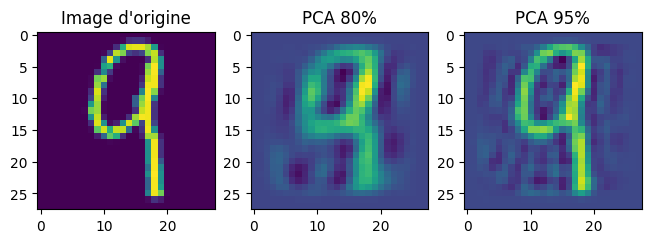

Représentations d'un 9


In [8]:
index_img = 10
fig, ax = plt.subplots(1, 3, constrained_layout=True)

original_img = emnist_data_set[index_img].reshape(28, 28).T
compressed_80 = decompressed_80[index_img].reshape(28, 28).T
compressed_95 = decompressed_95[index_img].reshape(28, 28).T

ax[0].imshow(original_img)
ax[0].set_title("Image d'origine")
ax[1].imshow(compressed_80)
ax[1].set_title("PCA 80%")
ax[2].imshow(compressed_95)
ax[2].set_title("PCA 95%")
plt.show()
print(f"Représentations d'un {Emnist.class_names[emnist_label_set[index_img]]}")

[Retour au sommaire](../README.md#table-des-matières)